In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

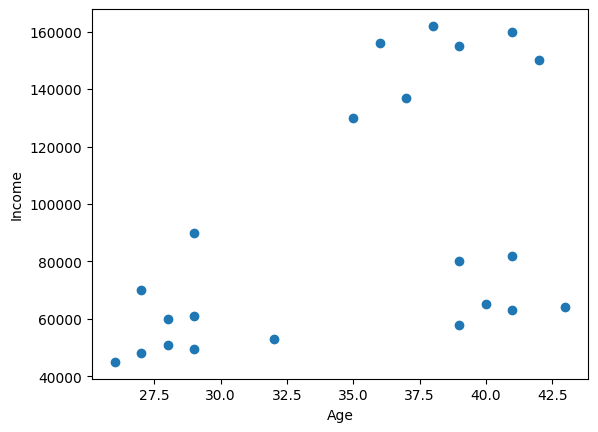

In [4]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')


Cluster means groups mai divide karna


In [5]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age', 'Income($)']])

In [6]:
y_predicted

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [7]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


C:\Users\Nisha Yadav\AppData\Local\Temp\ipykernel_10632\3118571772.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


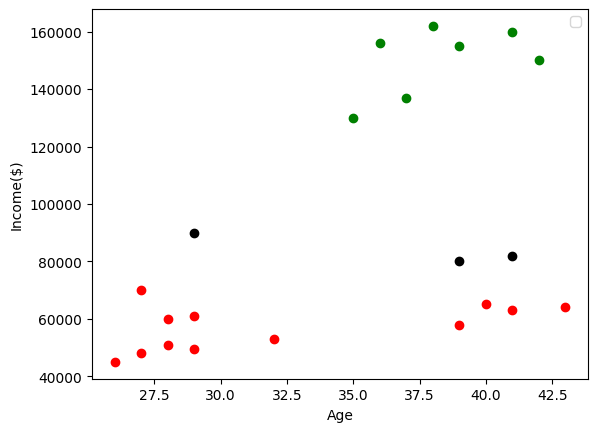

In [8]:
df1=df[df.cluster == 0]
df2=df[df.cluster == 1]
df3=df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')    
plt.legend()

After Standard scaling

In [9]:
scaler= StandardScaler()

scaler.fit(df[[ 'Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [10]:
df.head()

,Name,Age,Income($),cluster
0,Rob,-1.356055,-0.480684,1
1,Michael,-1.009157,-0.010159,2
2,Mohan,-1.009157,-0.692421,1
3,Ismail,-1.182606,-0.715947,1
4,Kory,1.245679,1.401417,0


In [11]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age', 'Income($)']])

In [12]:
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [13]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,-1.356055,-0.480684,1
1,Michael,-1.009157,-0.010159,1
2,Mohan,-1.009157,-0.692421,1
3,Ismail,-1.182606,-0.715947,1
4,Kory,1.245679,1.401417,0


In [14]:
#to find the centriod points
km.cluster_centers_

array([[ 0.60143983,  1.40141653],
       [-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261]])

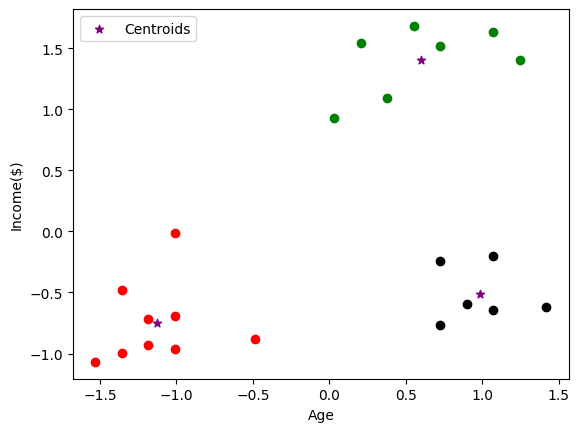

In [15]:
df1=df[df.cluster == 0]
df2=df[df.cluster == 1]
df3=df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Income($)')    
plt.legend()

centriod - ek point h

Elbow method are used in k_means for deciding the clusters
- neeche wala graph ex hai jis mai edge point decide kar raha hai no.of cluster

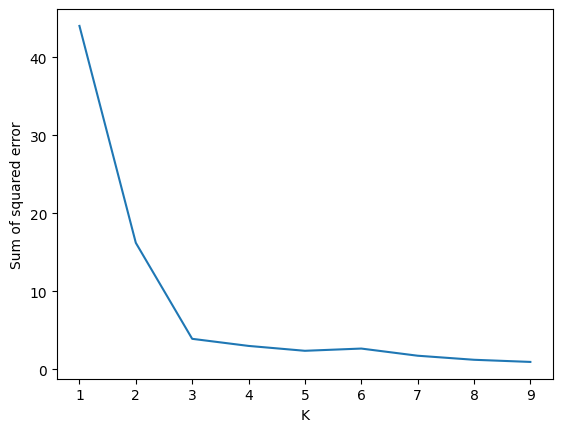

In [16]:
sse=[]
k_rng=range(1, 10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)



sum of squared error 

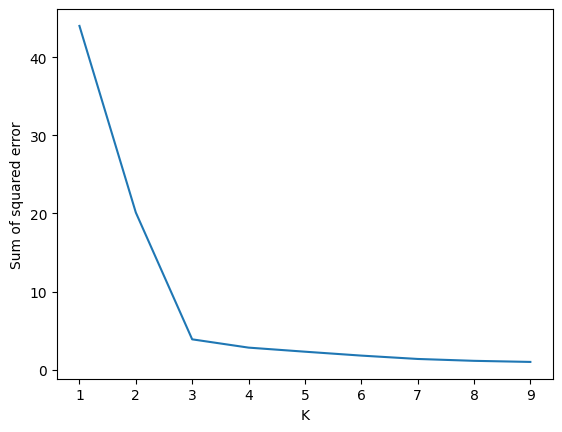

In [17]:
sse=[]
k_rng=range(1, 10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
